In [ ]:
!pip install librosa # librosa 라는 패키지가 필요하므로 설치하는 코드입니다.

In [11]:
# 임포트
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import IPython
import os
import numpy as np
import librosa, librosa.display

%matplotlib inline

In [9]:
# 데이터 로드

base_path = './data/example/'

files = ['zero.wav', 'one.wav', 'two.wav', 'three.wav', 'four.wav', 'five.wav', 'six.wav', 'seven.wav', 'eight.wav', 'nine.wav']

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},
#   "one.wav": {"sample_rate": 8000, "samples": [...]},
#   ...
#   "nine.wav": {"sample_rate": 8000, "samples": [...]}}

# 샘플 데이터 저장하는 법을 변경했습니다
sample_list = []
for f in files:
    wf = wavfile.read(base_path + f)
    assert wf[0] == 8000, "sampling rate must be 8000" # 샘플링 레이트는 무조건 8000이여야 합니다.
    sample_list.append(wavfile.read(base_path + f)[1])

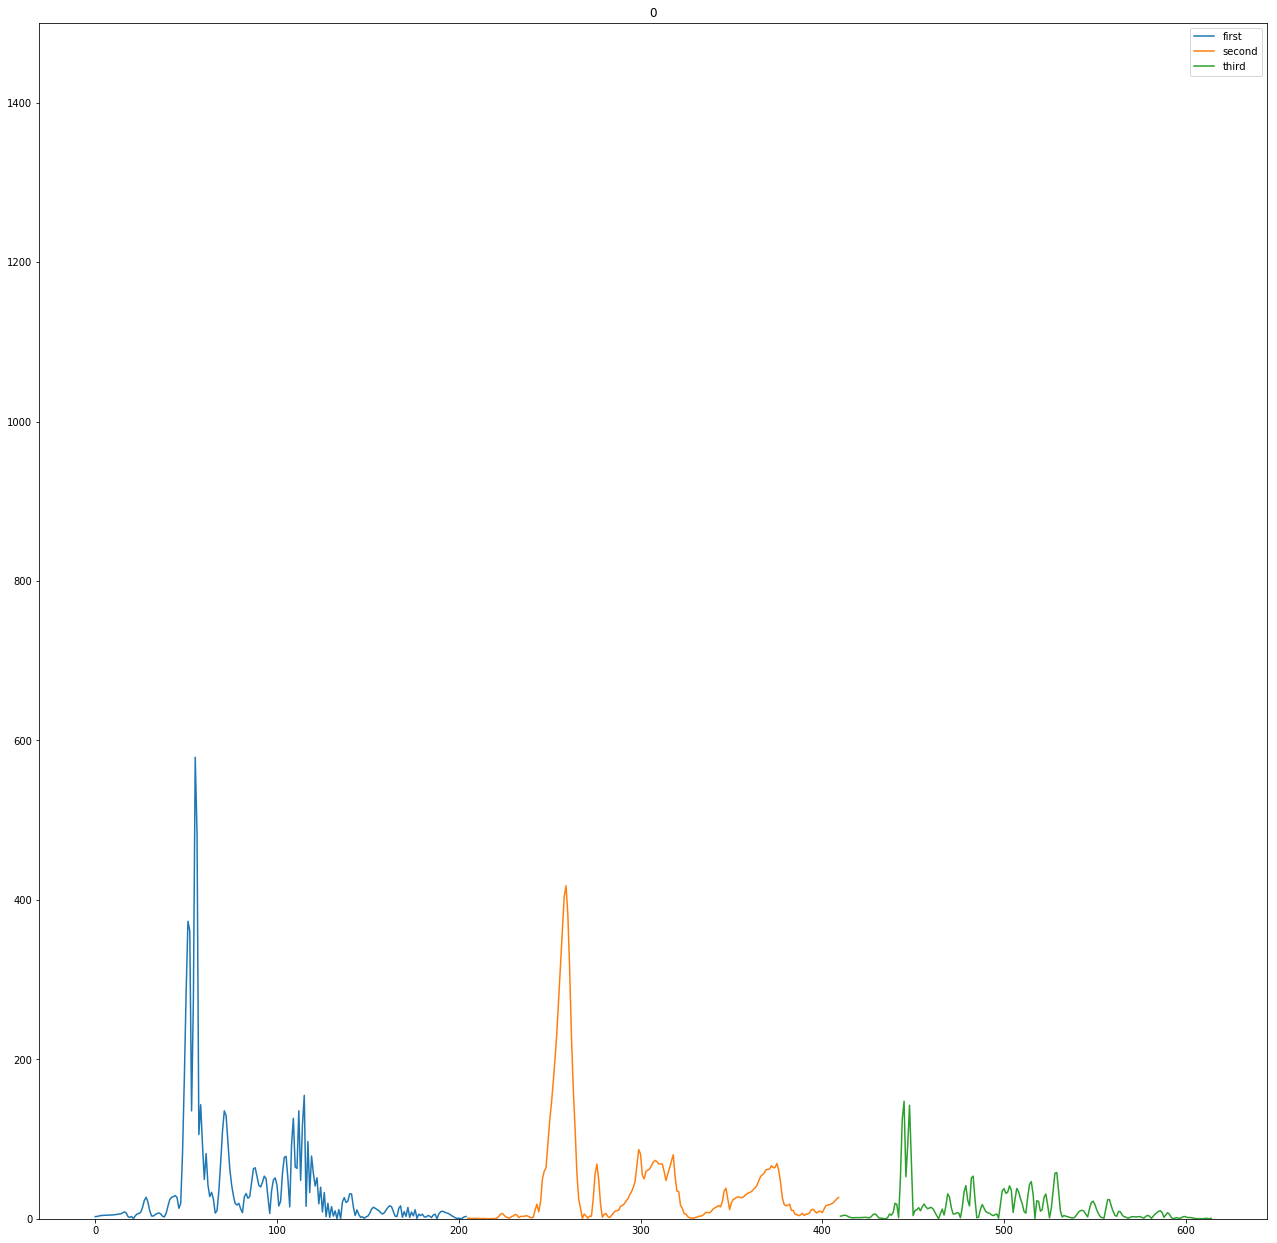

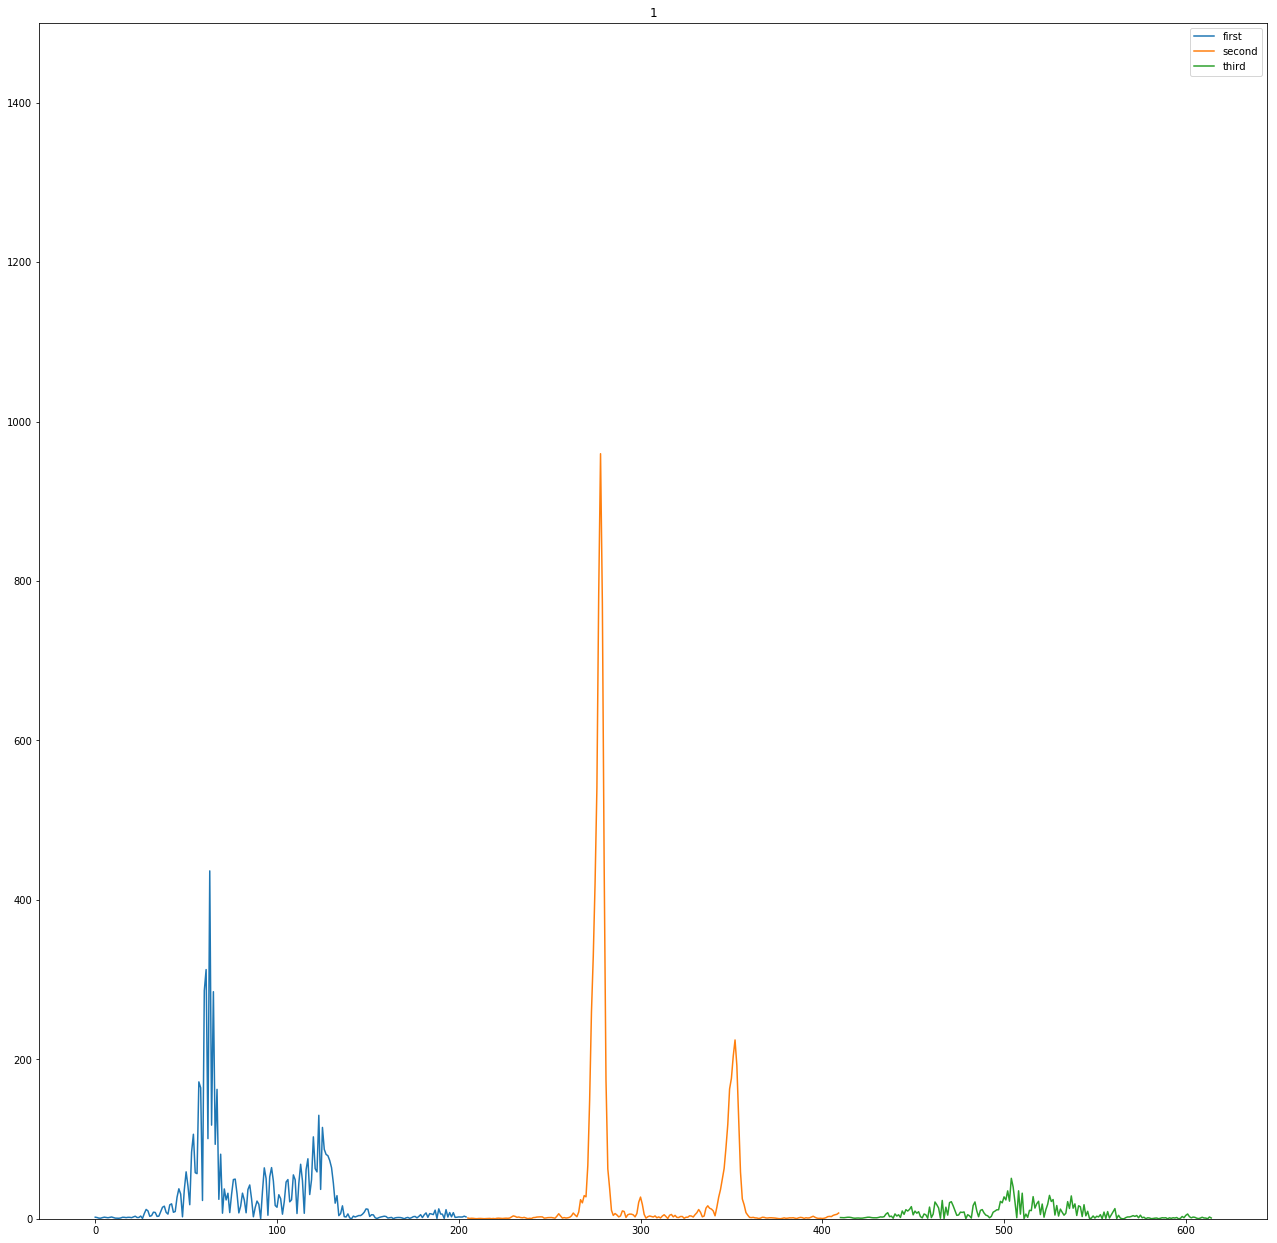

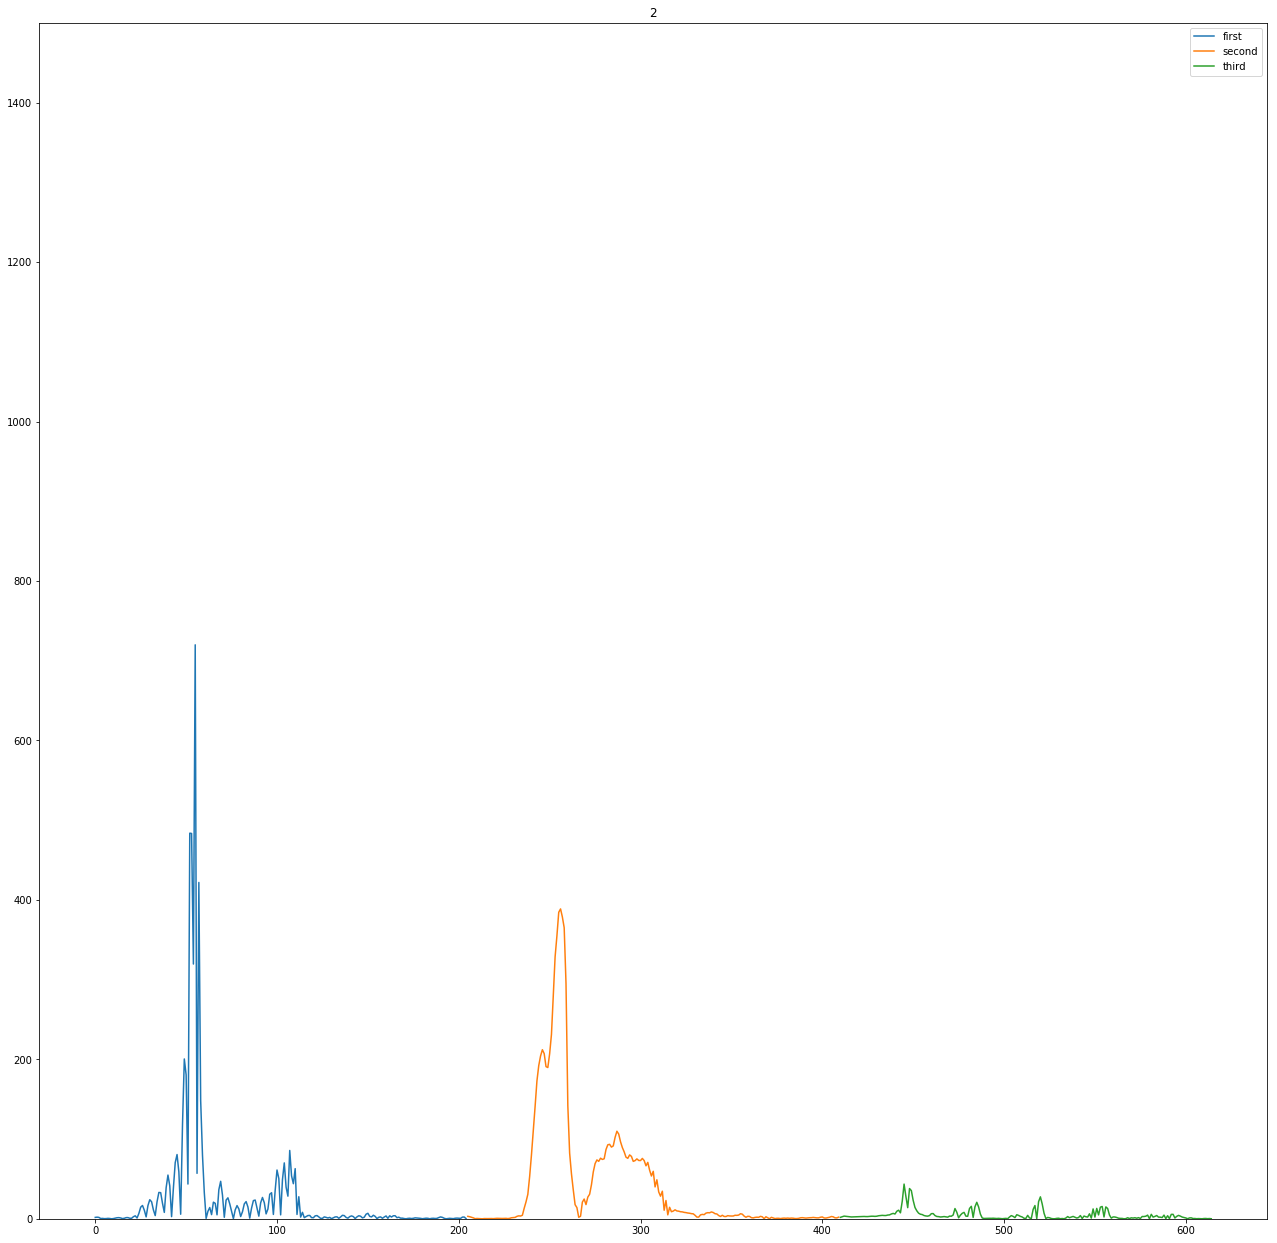

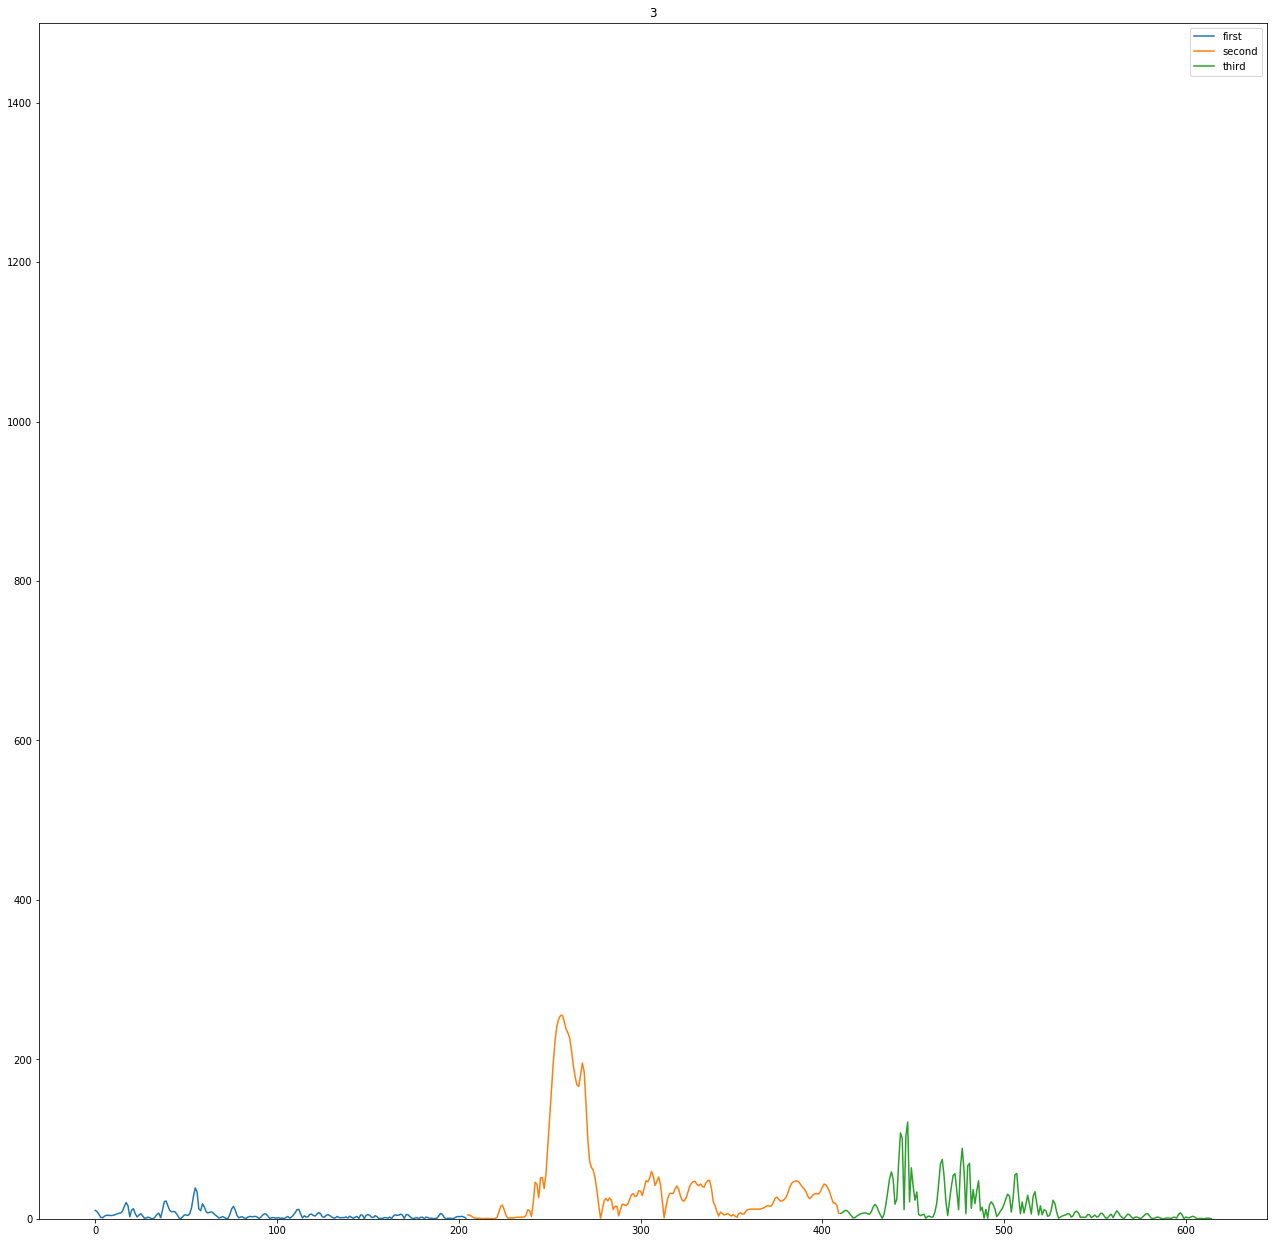

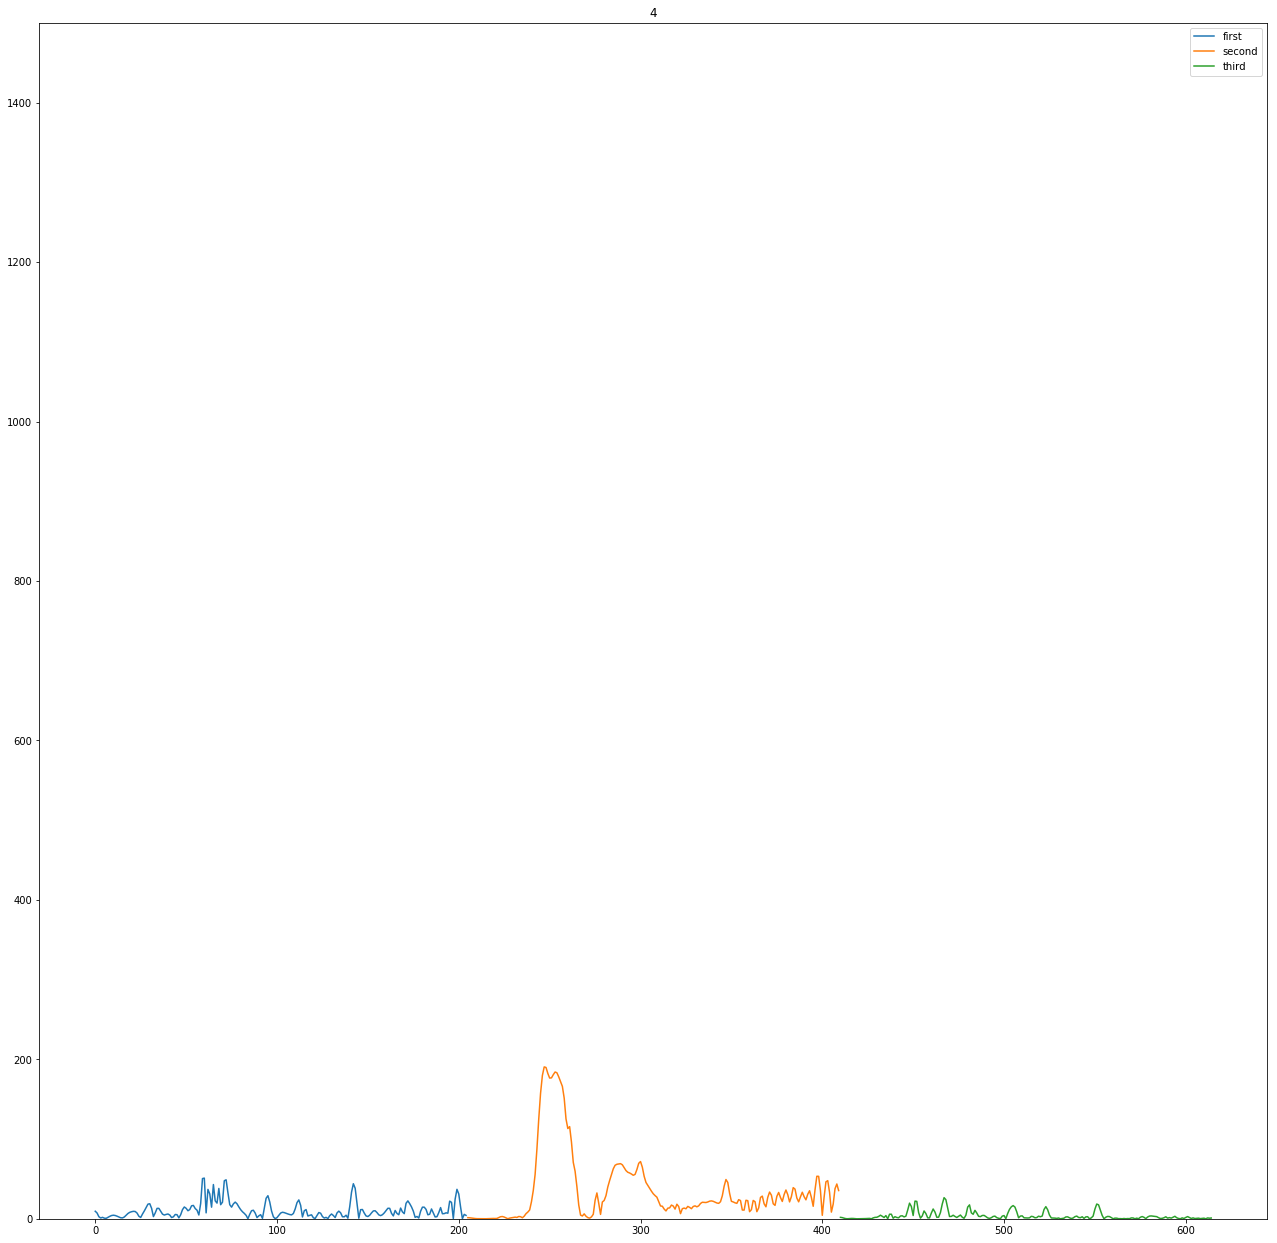

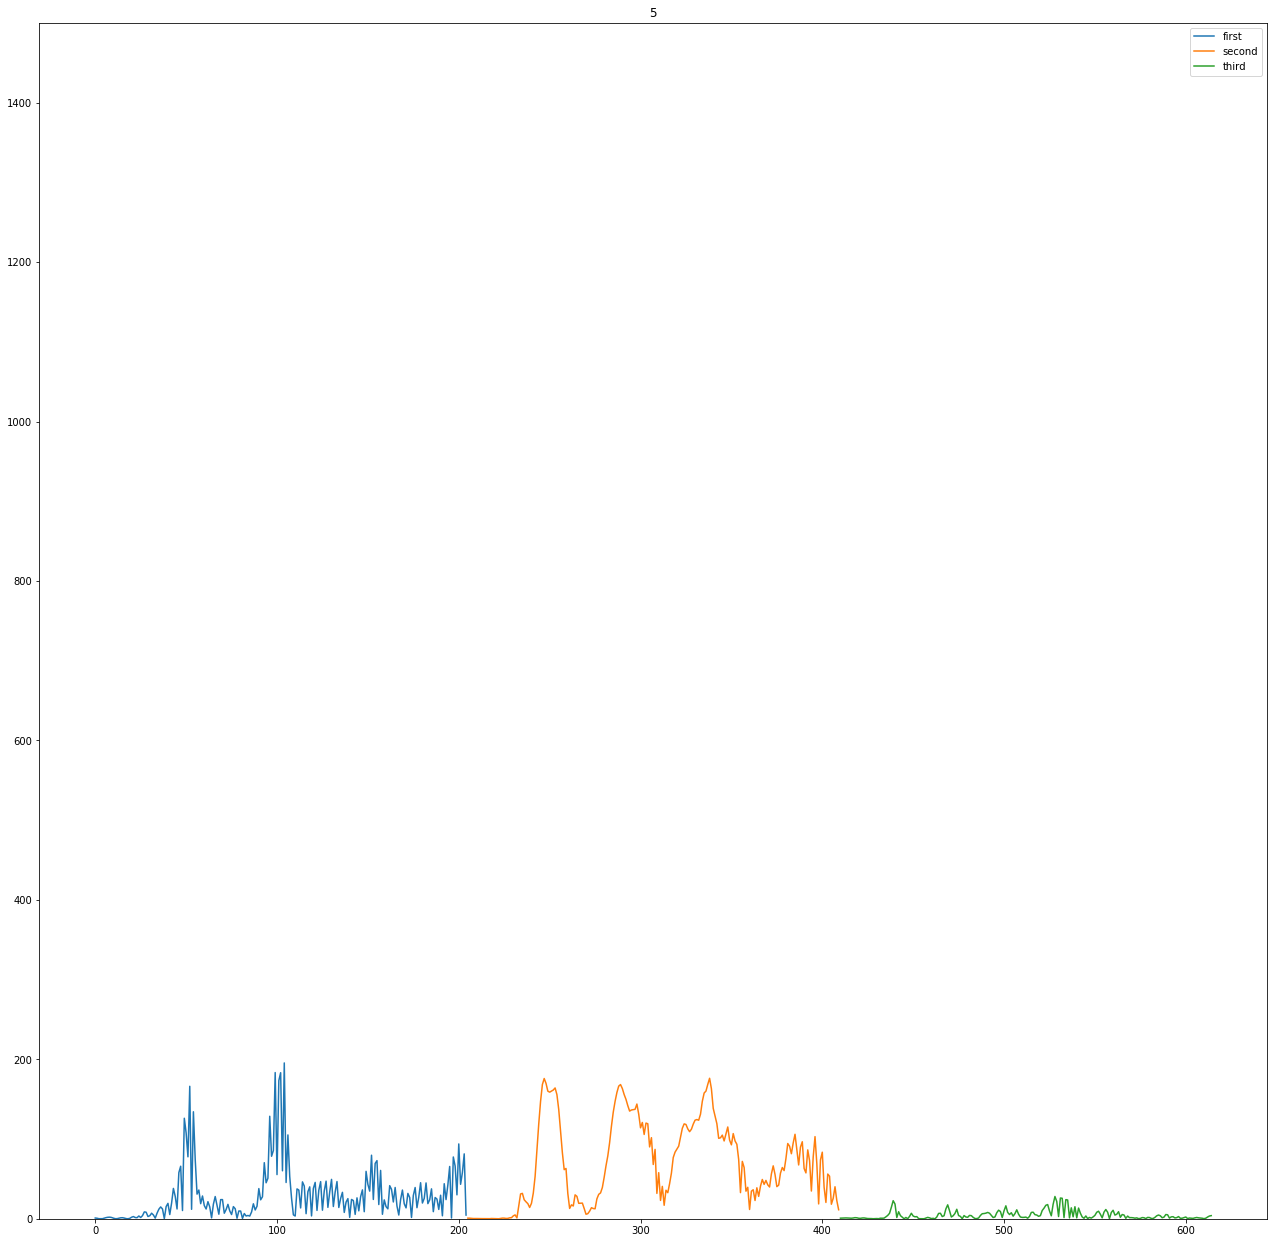

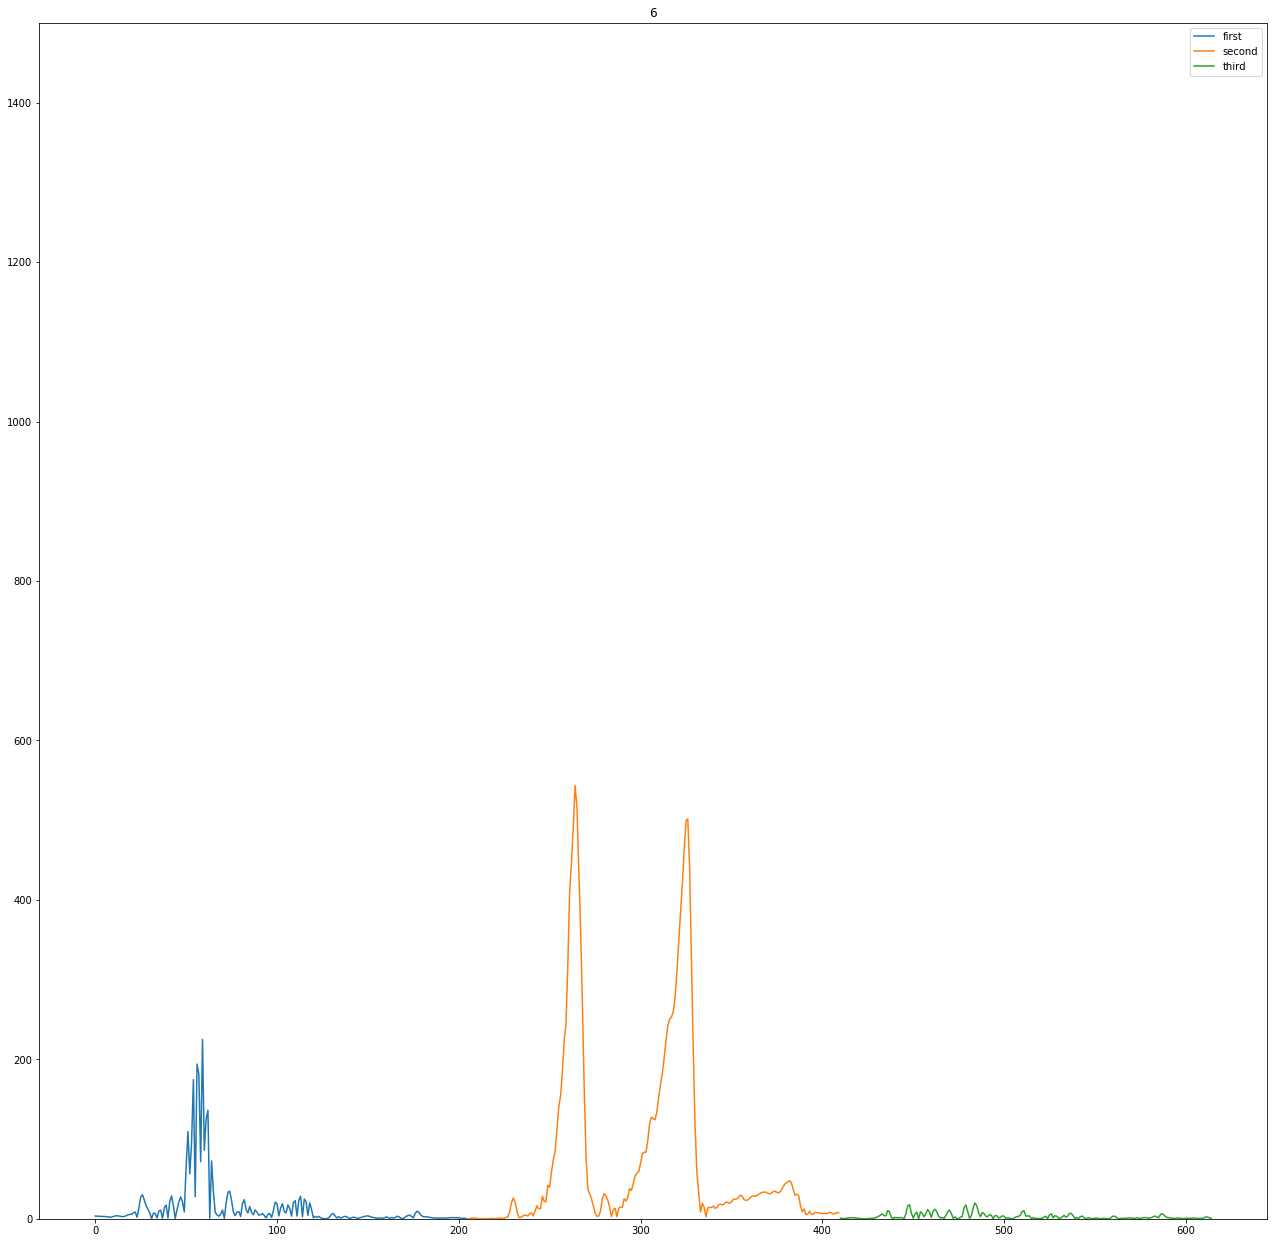

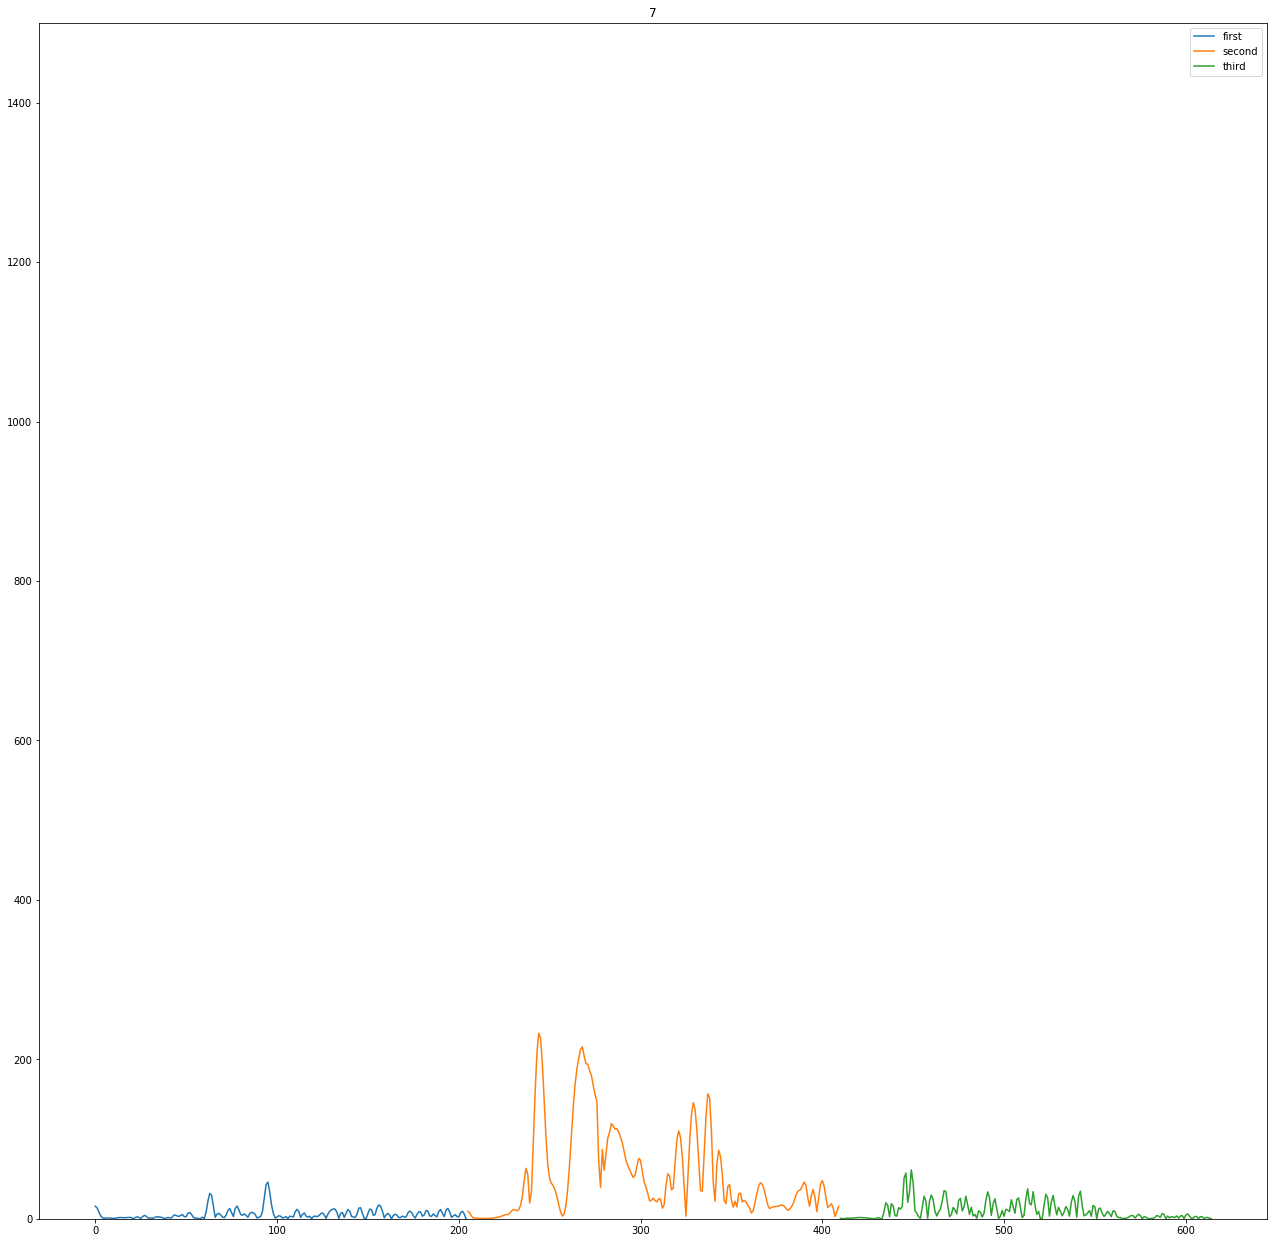

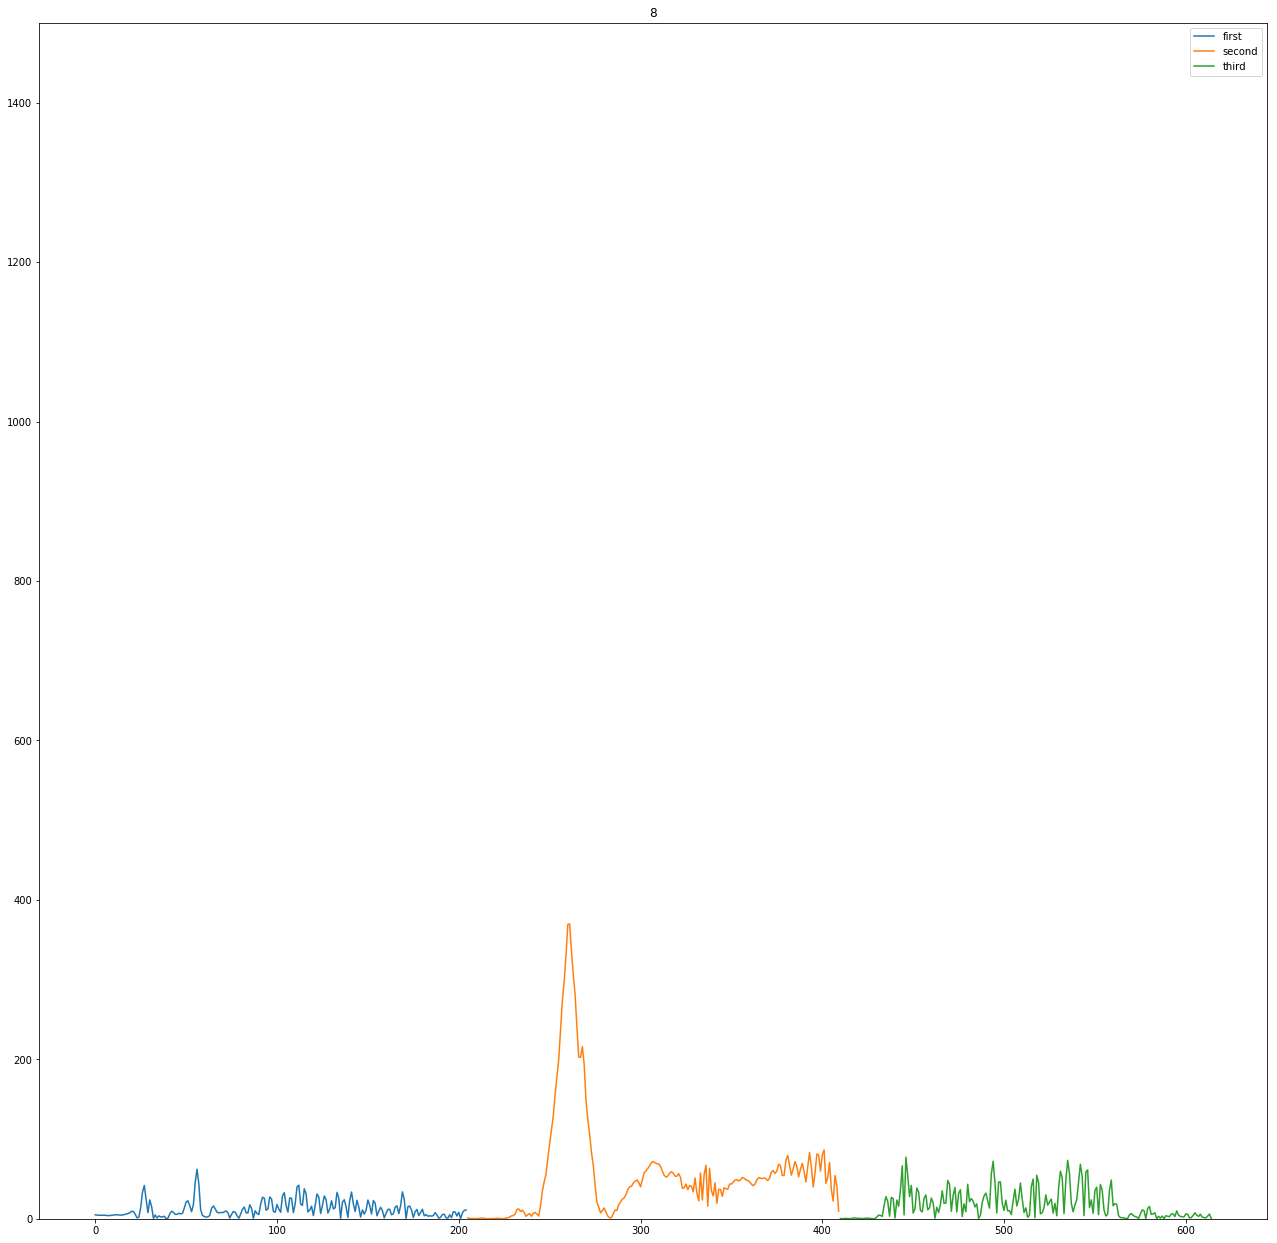

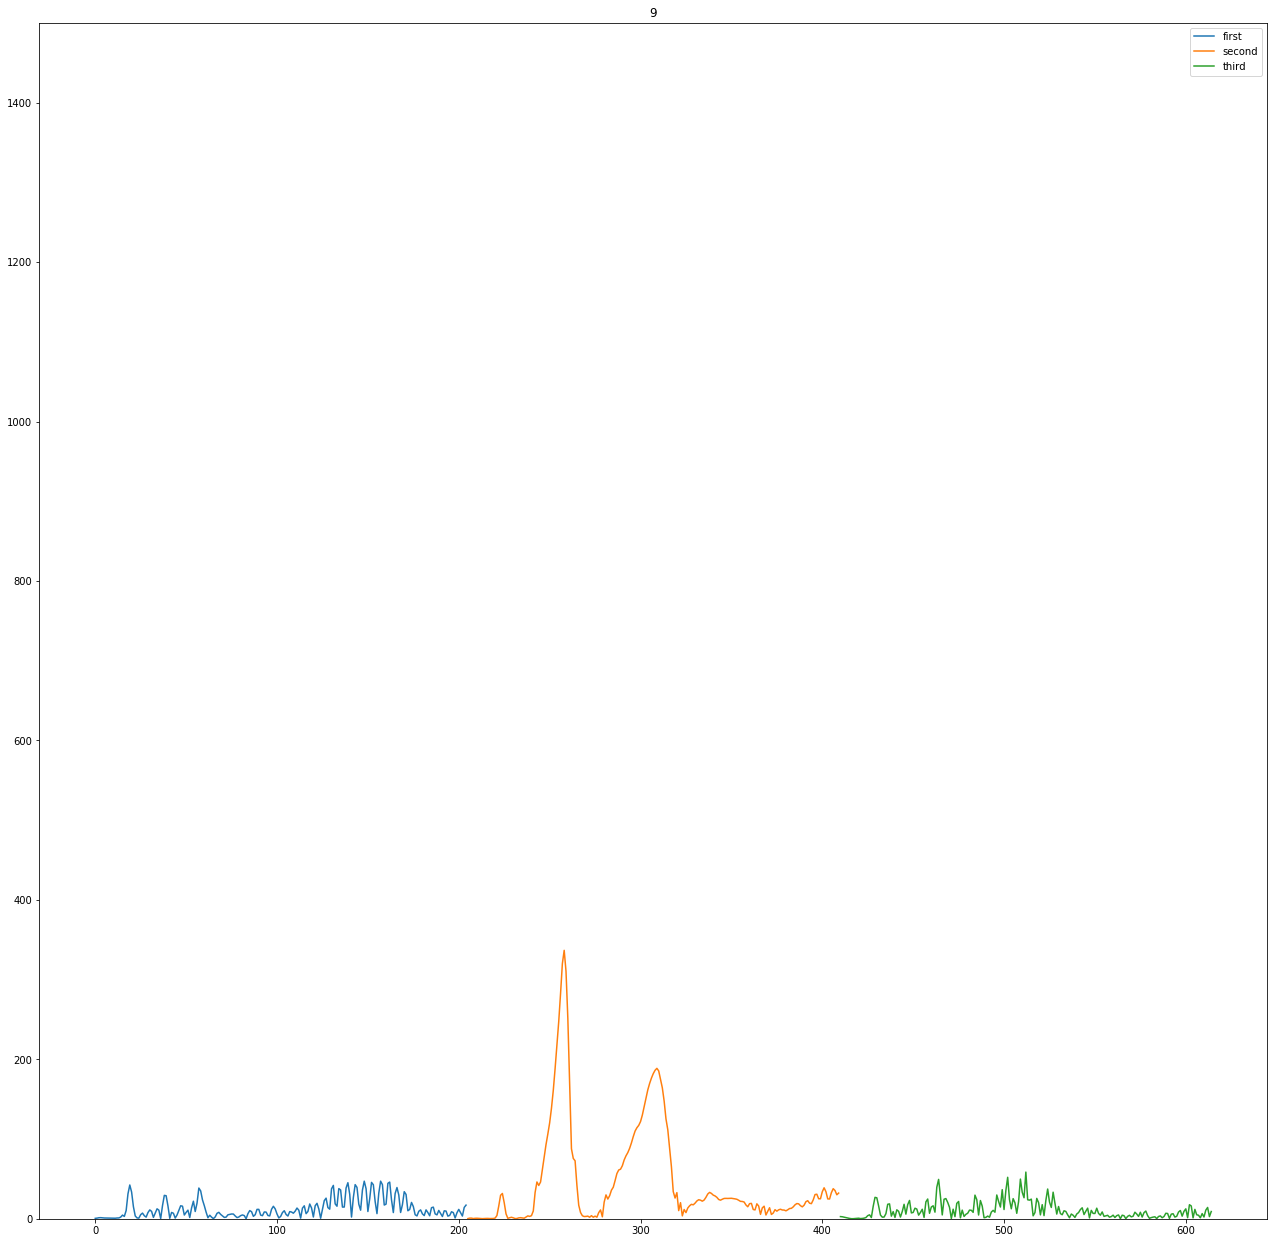

In [22]:
for i, value in enumerate(sample_list):
    
    D = np.abs(librosa.stft(np.asarray(value, dtype='float32'), hop_length = len(value)// 2, win_length = len(value)// 2)) / 1000
    D.shape
    plt.figure(figsize=(22,22))
    plt.ylim([0, 1500])
    plt.plot(range(D.shape[0]//5 * 0, D.shape[0]//5 * 1), D[:D.shape[0]//5, 0], label='first')

    #plt.subplot(3, 1, 2)
    plt.plot(range(D.shape[0]//5 * 1, D.shape[0]//5 * 2), D[:D.shape[0]//5, 1], label='second')

    #plt.subplot(3, 1, 3)
    plt.plot(range(D.shape[0]//5 * 2, D.shape[0]//5 * 3), D[:D.shape[0]//5, 2], label='third')
    
    plt.title(i)
    plt.legend()

(1025, 29)


<Figure size 864x360 with 0 Axes>

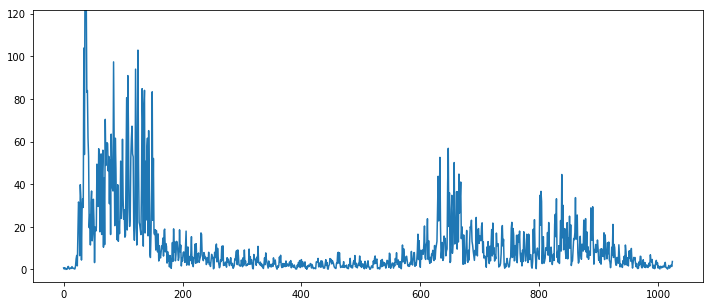

In [16]:
D = np.abs(librosa.stft(np.asarray(sample_list[8], dtype='float32'), hop_length = 100)) / 1000
print(D.shape)
# plt.plot(D[:, 2])

from IPython.display import HTML
from matplotlib import animation

plt.rcParams['animation.ffmpeg_path'] = '/home/user/anaconda3/bin/ffmpeg'
plt.figure(figsize=(12,5))
fig, ax = plt.subplots(figsize=(12,5))

x = np.arange(0, D[:, 0].shape[0], 1)
line, = ax.plot(x, D[:, 0])


def init():  # only required for blitting to give a clean slate.
    line.set_ydata(D[:, 0])
    return line,


def animate(i):
    line.set_ydata(D[:, i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, frames = D.shape[1], init_func=init, interval=50, blit=True)

HTML(ani.to_html5_video())


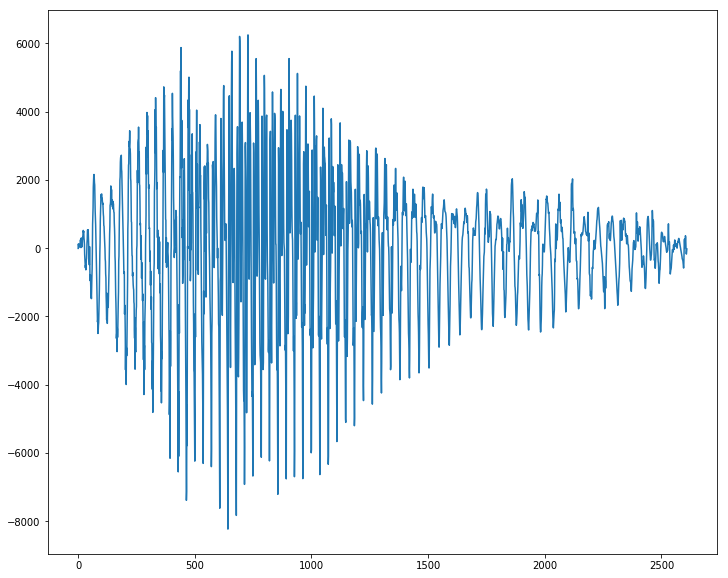

In [18]:
# 0 ㅇ ㅕ ㅇ
# 1 ㅇ ㅣ ㄹ
# 2 ㅇ ㅣ
# 3 ㅅ ㅏ ㅁ
# 4 ㅅ ㅏ
# 5 ㅇ ㅗ
# 6 ㅇ ㅠ ㄱ
# 7 ㅊ ㅣ ㄹ
# 8 ㅍ ㅏ ㄹ
# 9 ㄱ ㅜ

# 중성 1 2 7 ㅣ   3 4 8 ㅏ  0 ㅕ   5 ㅗ   6 ㅠ   9 ㅜ
# 초성 0 1 2 5 6 ㅇ    3 4 ㅅ    7 ㅊ    8 ㅍ    9 ㄱ
# 종성 2 4 5 9 x   1 7 8 ㄹ   0 ㅇ  3 ㅁ    6 ㄱ